In [1]:
# ============================================================
# TUGAS AKHIR 09 (TA-09)
# Mata Praktikum : Pembelajaran Mesin
# Topik : K-Means Clustering
# Dataset : Mall_Customers.csv (Kaggle)
# ============================================================

# 1️⃣ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# 2️⃣ Load Dataset
df = pd.read_csv("Mall_Customers.csv")
print("Jumlah Data:", df.shape)
df.head()

Jumlah Data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 3️⃣ Data Preprocessing
# Hapus kolom ID (tidak relevan untuk clustering)
df = df.drop(columns=["CustomerID"])

# Encode Gender → numerik
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Cek missing value
print("\nMissing Value Tiap Kolom:\n", df.isnull().sum())


Missing Value Tiap Kolom:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# 4️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

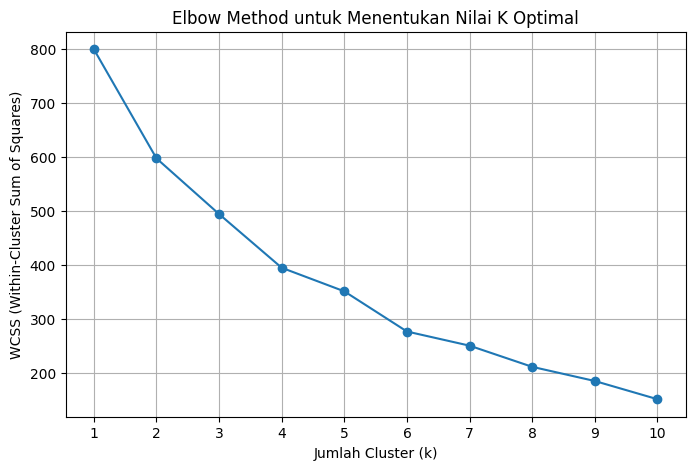

In [5]:
# 5️⃣ Menentukan Jumlah Cluster Optimal (Elbow Method)
WCSS = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, WCSS, marker='o')
plt.title("Elbow Method untuk Menentukan Nilai K Optimal")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Berdasarkan grafik Elbow, pilih k = 4 (umumnya paling ideal untuk dataset ini)
optimal_k = 4


In [6]:
# 6️⃣ K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

print("\nDistribusi Data per Cluster:\n", df["Cluster"].value_counts())


Distribusi Data per Cluster:
 Cluster
3    64
0    60
2    42
1    34
Name: count, dtype: int64


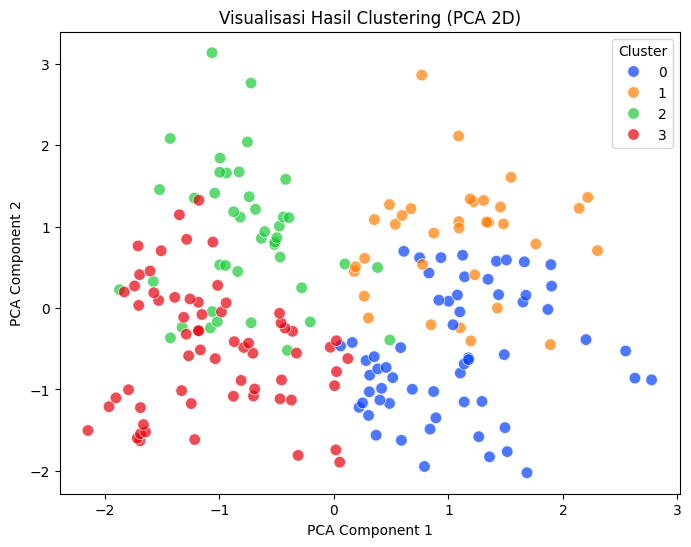

In [7]:
# 7️⃣ Visualisasi PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
palette = sns.color_palette("bright", optimal_k)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=clusters, palette=palette, alpha=0.7, s=70)
plt.title("Visualisasi Hasil Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


Profil Statistik Tiap Cluster:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.433333  54.700000           46.900000               39.933333
1        0.588235  41.264706           88.500000               16.764706
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  29.375000           58.296875               64.437500


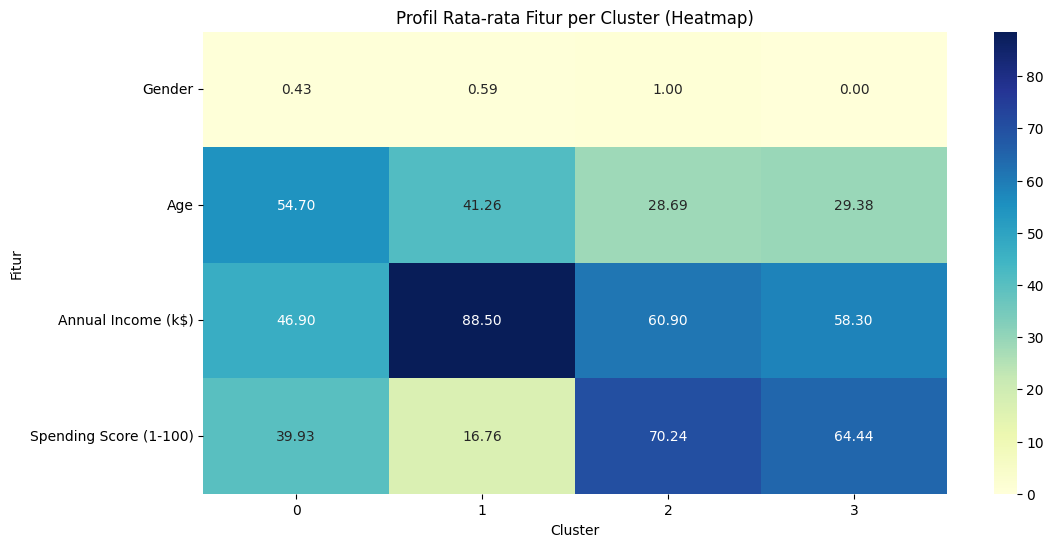

In [8]:
# 8️⃣ Profiling Tiap Cluster
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
print("\nProfil Statistik Tiap Cluster:\n", cluster_profile)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Profil Rata-rata Fitur per Cluster (Heatmap)")
plt.ylabel("Fitur")
plt.xlabel("Cluster")
plt.show()

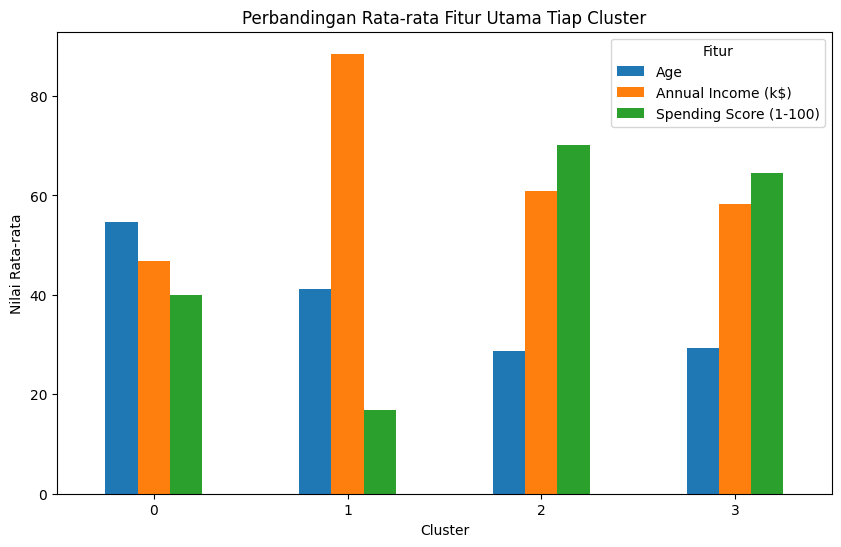

In [9]:
# Bar Chart untuk fitur utama
key_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
cluster_profile[key_features].plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Rata-rata Fitur Utama Tiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Nilai Rata-rata")
plt.xticks(rotation=0)
plt.legend(title="Fitur")
plt.show()